<a href="https://colab.research.google.com/github/slowhandc1ap/RecomendMovie-Kmean/blob/main/modelMovieClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = "pink" > 1. install pagkage to scrapping data from website

In [ ]:
pip install bs4

In [ ]:
pip install requests

In [ ]:
pip install azure-storage-blob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.5/394.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
import bs4

In [ ]:
import requests
import pandas as pd

#<font color = "pink" > 2. get data to DataFrame


#Netflix Original Series Top 100 (ranked) - IMDb
ดึงค่า ข้อมูลชื่อ, หัวข้อ, และโหวต เก็บไว้ใน DataFrame บันทึก DataFrame เป็นไฟล์ Excel และ CSV

In [ ]:
# สร้างลิสต์เปล่าสำหรับเก็บข้อมูลชื่อ, หัวข้อ, และโหวต
name_list = []
title_list = []
votes_list = []
rating_list = []

data = requests.get('https://www.imdb.com/list/ls063868333/')
soup = bs4.BeautifulSoup(data.text)

# วน loop ในทุกๆ element ที่มี class เป็น "lister-item-content"
for c in soup.find_all("div",{"class" :"lister-item-content"}):
    # หาชื่อของรายการและเพิ่มลงใน name_list
    shirt = c.find("h3",{"class":"lister-item-header"})
    name_list.append(shirt.find('a').text.strip("\n").replace(" ", ""))

    # หาหัวข้อของรายการและเพิ่มลงใน title_list
    title = c.find("p",{"class" :""}).text.strip("\n")
    title_words = title.split()  # แยกคำในหัวข้อเป็นคำโดยใช้ช่องว่างเป็นตัวแยก
    title_list.append(title_words)

    # หาคะแนนและเพิ่มลงใน rating_list
    rating = c.find("span", {"class": "ipl-rating-star__rating"})
    rating_list.append(rating.text.strip() if rating else 'N/A')

    # หาค่า Votes และเพิ่มลงใน votes_list
    votes = c.find("span", {"name": "nv"})
    votes_list.append(votes['data-value'] if votes else 'N/A')

# สร้าง DataFrame จาก name_list, title_list, และ votes_list
table = pd.DataFrame([name_list, title_list,  rating_list,votes_list]).transpose()
table.columns = ['name', 'title',  'rating', 'votes']

# กำหนด index เริ่มต้นที่ 1
table.index += 1

# บันทึก DataFrame เป็นไฟล์ Excel และ CSV
table.to_excel('TOP100NETFLIX.xlsx', engine='openpyxl')  # บันทึกเป็น Excel
table.to_csv('TOP100NETFLIX.csv', index=False)  # บันทึกเป็น CSV โดยไม่รวม index


แสดงค่าtable มาดู

In [ ]:
table

,name,title,rating,votes
1,OurPlanet,"[Explores, and, unravels, the, mystery, of, ho...",9.3,50563
2,TheLastDance,"[Led, by, Michael, Jordan,, the, 1990s, Chicag...",9.1,150847
3,WhenTheySeeUs,"[Five, teens, from, Harlem, become, trapped, i...",8.8,137207
4,BlackMirror,"[Featuring, stand-alone, dramas, --, sharp,, s...",8.7,636724
5,Narcos,"[A, chronicled, look, at, the, criminal, explo...",8.8,468156
...,...,...,...,...
96,IThinkYouShouldLeavewithTimRobinson,"[A, sketch, show, where, Tim, Robinson, and, h...",8,20983
97,You,"[A, dangerously, charming,, intensely, obsessi...",7.7,297872
98,Love,"[A, program, that, follows, a, couple, who, mu...",7.6,45875
99,AliasGrace,"[Grace,, an, Irish, immigrant, in, 19th-centur...",7.6,37645


#Top 100 Movies - Rotten Tomatoes
ดึงค่า ข้อมูลชื่อ, หัวข้อ, และโหวต เก็บไว้ใน DataFrame บันทึก DataFrame เป็นไฟล์ Excel และ CSV

In [ ]:
# สร้างลิสต์เปล่าสำหรับเก็บข้อมูลชื่อ, หัวข้อ, และโหวต
name_list = []
title_list = []
votes_list = []
rating_list = []

data = requests.get('https://www.imdb.com/list/ls041667789/')
soup = bs4.BeautifulSoup(data.text)

# วน loop ในทุกๆ element ที่มี class เป็น "lister-item-content"
for c in soup.find_all("div",{"class" :"lister-item-content"}):
    # หาชื่อของรายการและเพิ่มลงใน name_list
    shirt = c.find("h3",{"class":"lister-item-header"})
    name_list.append(shirt.find('a').text.strip("\n").replace(" ", ""))

    # หาหัวข้อของรายการและเพิ่มลงใน title_list
    title = c.find("p",{"class" :""}).text.strip("\n")
    title_words = title.split()  # แยกคำในหัวข้อเป็นคำโดยใช้ช่องว่างเป็นตัวแยก
    title_list.append(title_words)

    # หาคะแนนและเพิ่มลงใน rating_list
    rating = c.find("span", {"class": "ipl-rating-star__rating"})
    rating_list.append(rating.text.strip() if rating else 'N/A')

    # หาค่า Votes และเพิ่มลงใน votes_list
    votes = c.find("span", {"name": "nv"})
    votes_list.append(votes['data-value'] if votes else 'N/A')

# สร้าง DataFrame จาก name_list, title_list, และ votes_list
tableTomato = pd.DataFrame([name_list, title_list,  rating_list,votes_list]).transpose()
tableTomato.columns = ['name', 'title',  'rating', 'votes']

# กำหนด index เริ่มต้นที่ 1
tableTomato.index += 1

# บันทึก DataFrame เป็นไฟล์ Excel และ CSV
tableTomato.to_excel('TOP100Tomato.xlsx', engine='openpyxl')  # บันทึกเป็น Excel
tableTomato.to_csv('TOP100Tomato.csv', index=False)  # บันทึกเป็น CSV โดยไม่รวม index


แสดงค่า tableTomato มาดู

In [ ]:
tableTomato

,name,title,rating,votes
1,12AngryMen,"[The, jury, in, a, New, York, City, murder, tr...",9,860786
2,12YearsaSlave,"[In, the, antebellum, United, States,, Solomon...",8.1,739520
3,AHardDay'sNight,"[Over, two, ""typical"", days, in, the, life, of...",7.5,47956
4,AStreetcarNamedDesire,"[Disturbed, Blanche, DuBois, moves, in, with, ...",7.9,114012
5,Alien,"[The, crew, of, a, commercial, spacecraft, enc...",8.5,946425
...,...,...,...,...
96,Up,"[78-year-old, Carl, Fredricksen, travels, to, ...",8.3,1120585
97,Vertigo,"[A, former, San, Francisco, police, detective,...",8.3,425579
98,WarforthePlanetoftheApes,"[After, the, apes, suffer, unimaginable, losse...",7.4,280726
99,WonderWoman,"[When, a, pilot, crashes, and, tells, of, conf...",7.3,698124


#รวมข้อมูลทั้งสองข้อมูลเข้าด้วยกัน

In [ ]:
import pandas as pd

# รวม DataFrame โดยเชื่อมข้อมูลตามแถว (เพิ่มข้อมูลใหม่เป็นแถวใน DataFrame ตัวแรก) โดยเป็นการ รวมโดยไม่สนใจ index เดิม
table = pd.concat([table, tableTomato], ignore_index=True)

# แสดงผลลัพธ์
table


,name,title,rating,votes
0,OurPlanet,"[Explores, and, unravels, the, mystery, of, ho...",9.3,50563
1,TheLastDance,"[Led, by, Michael, Jordan,, the, 1990s, Chicag...",9.1,150847
2,WhenTheySeeUs,"[Five, teens, from, Harlem, become, trapped, i...",8.8,137207
3,BlackMirror,"[Featuring, stand-alone, dramas, --, sharp,, s...",8.7,636724
4,Narcos,"[A, chronicled, look, at, the, criminal, explo...",8.8,468156
...,...,...,...,...
195,Up,"[78-year-old, Carl, Fredricksen, travels, to, ...",8.3,1120585
196,Vertigo,"[A, former, San, Francisco, police, detective,...",8.3,425579
197,WarforthePlanetoftheApes,"[After, the, apes, suffer, unimaginable, losse...",7.4,280726
198,WonderWoman,"[When, a, pilot, crashes, and, tells, of, conf...",7.3,698124


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#ตัดคำเฉพาะ

In [ ]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# นับความถี่ของคำทั้งหมดใน DataFrame
all_words = [word for sublist in table['title'] for word in sublist]
word_freq = Counter(all_words)

# เลือกคำที่เป็นคำเฉพาะ
proper_nouns = [word for word, tag in nltk.pos_tag(all_words) if tag == 'NNP']

# สร้าง pattern จากคำที่ต้องการลบ
pattern = '|'.join(r'\b{}\b'.format(re.escape(word)) for word in proper_nouns)

# ลบคำที่เป็นคำเฉพาะออกจาก column 'title' ใน DataFrame
table['title'] = table['title'].apply(lambda x: [word for word in x if not re.match(pattern, word)])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#แปลงประเภทข้อมูลให้ทุกคอลัมน์ใน DataFrame เป็นประเภท string

In [ ]:
table['title'] = table['title'].astype(str)

#สร้างฟังก์ชัน lambda เพื่อใช้ในการประมวลผลข้อมูลในคอลัมน์ 'title'


In [ ]:
table['title'] = table['title'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


#แสดงคอลัม titleในตาราง table

In [ ]:
table['title']

0      [Explores, and, unravels, the, mystery, of, ho...
1      [by, Jordan,, the, 1990s, establish, themselve...
2      [Five, teens, from, become, trapped, in, a, ni...
3      [Featuring, stand-alone, dramas, --, sharp,, s...
4      [chronicled, look, at, the, criminal, exploits...
                             ...                        
195    [78-year-old, travels, to, Paradise, in, his, ...
196    [former, police, detective, juggles, wrestling...
197    [After, the, apes, suffer, unimaginable, losse...
198    [When, a, pilot, crashes, and, tells, of, conf...
199    [In, a, city, of, anthropomorphic, animals,, a...
Name: title, Length: 200, dtype: object

In [ ]:
table

,name,title,rating,votes
0,OurPlanet,"[Explores, and, unravels, the, mystery, of, ho...",9.3,50563
1,TheLastDance,"[by, Jordan,, the, 1990s, establish, themselve...",9.1,150847
2,WhenTheySeeUs,"[Five, teens, from, become, trapped, in, a, ni...",8.8,137207
3,BlackMirror,"[Featuring, stand-alone, dramas, --, sharp,, s...",8.7,636724
4,Narcos,"[chronicled, look, at, the, criminal, exploits...",8.8,468156
...,...,...,...,...
195,Up,"[78-year-old, travels, to, Paradise, in, his, ...",8.3,1120585
196,Vertigo,"[former, police, detective, juggles, wrestling...",8.3,425579
197,WarforthePlanetoftheApes,"[After, the, apes, suffer, unimaginable, losse...",7.4,280726
198,WonderWoman,"[When, a, pilot, crashes, and, tells, of, conf...",7.3,698124


#ตัดคำที่ไม่จำเป็น คอลัม title

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

# นำเข้าคำที่ไม่จำเป็น
stop_words = set(stopwords.words('english'))

# ฟังก์ชันสำหรับลบ stop words
def remove_stopwords(title):
    if isinstance(title, list):  # ตรวจสอบว่าข้อมูลเป็นลิสต์ของสตริงหรือไม่
        tokens = title
    else:
        tokens = word_tokenize(title)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_tokens)  # เชื่อมต่อคำที่กรองด้วยช่องว่าง

# ลบ stop words ออกจากคอลัมน์ 'title' ใน DataFrame
table['title'] = table['title'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
table

,name,title,rating,votes
0,OurPlanet,"Explores unravels mystery animals migrate, sho...",9.3,50563
1,TheLastDance,"Jordan, 1990s establish one notable dynasties ...",9.1,150847
2,WhenTheySeeUs,Five teens become trapped nightmare they're fa...,8.8,137207
3,BlackMirror,"Featuring stand-alone dramas -- sharp, suspens...",8.7,636724
4,Narcos,chronicled look criminal exploits Colombian dr...,8.8,468156
...,...,...,...,...
195,Up,78-year-old travels Paradise house equipped ba...,8.3,1120585
196,Vertigo,former police detective juggles wrestling pers...,8.3,425579
197,WarforthePlanetoftheApes,"apes suffer unimaginable losses, wrestles dark...",7.4,280726
198,WonderWoman,"pilot crashes tells conflict outside world, Di...",7.3,698124


In [ ]:
#pre process
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

#ดึงข้อมูลจากคอลัมน์ 'title' ในตาราง 'table' และเก็บไว้ในตัวแปร documents ในรูปแบบของอาร์เรย์

In [ ]:
documents = table['title'].values.astype("U")

#สร้าง Vectorizer แบบ TF-IDF โดยกำหนดให้ใช้ English stop word

In [ ]:
vectorizer = TfidfVectorizer (stop_words='english')
#ดำเนินการแปลงข้อมูลข้อความใน documents เป็นเวกเตอร์ TF-IDF โดยใช้ Vectorizer ที่สร้างขึ้น
#ผลลัพธ์จะเป็นเมทริกซ์ที่แทนเวกเตอร์ TF-IDF ของแต่ละเอกสาร
X = vectorizer.fit_transform(documents)

In [ ]:
documents

array(['Explores unravels mystery animals migrate, showing dramatic compelling stories natural world spectacular innovative cinematography.',
       'Jordan, 1990s establish one notable dynasties sports history.',
       "Five teens become trapped nightmare they're falsely accused brutal attack Park. Based true story.",
       'Featuring stand-alone dramas -- sharp, suspenseful, satirical tales explore techno-paranoia -- "Black Mirror" contemporary reworking "The Zone" stories tap collective unease modern world.',
       'chronicled look criminal exploits Colombian drug lord Escobar, well many drug kingpins plagued country years.',
       'family saga supernatural twist, set German town disappearance two young children exposes relationships among four families.',
       'young boy vanishes, small town uncovers mystery involving secret experiments, terrifying supernatural forces one strange little girl.',
       'works equally conniving wife exact revenge people betrayed him.',
       '

#ใช้ KMeans แบ่งกลุ่มข้อมูลโดยใช้จำนวนกลุ่มต่างๆ (k) ตั้งแต่2ถึง 20 เพื่อหาค่า k ที่ดีที่สุด

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

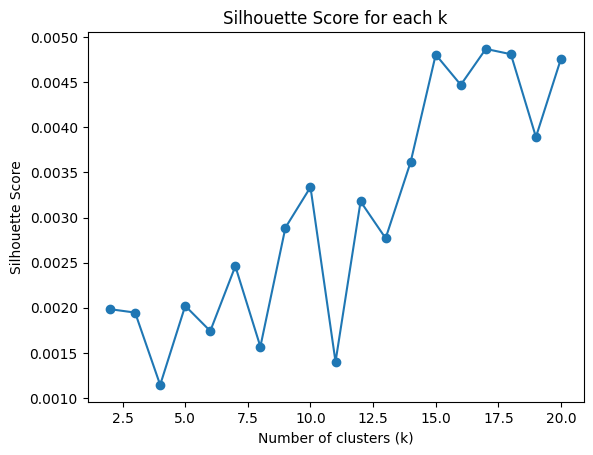

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score  # เพิ่มบรรทัดนี้

# กำหนด TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# กำหนดช่วงของค่า k ที่คุณต้องการลอง
k_values = range(2, 21)

# สร้างรายการว่างเพื่อเก็บค่า silhouette score
silhouette_scores = []

# วนลูปผ่านทุกค่า k
for k in k_values:
    # กำหนดโมเดล KMeans ด้วยจำนวน cluster เท่ากับ k
    kmeans = KMeans(n_clusters=k, random_state=42)

    # ฝึกโมเดลของคุณด้วยข้อมูล
    kmeans.fit(X)

     # ทำนาย clusters
    clusters = kmeans.predict(X)

    # คำนวณค่า silhouette score
    silhouette_avg = silhouette_score(X, clusters)

    # เพิ่ม silhouette score เข้าไปในรายการ
    silhouette_scores.append(silhouette_avg)

# พล็อต silhouette scores
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for each k')
plt.show()


#ใช้วิธี KMeans แบ่งกลุ่มข้อมูลออกเป็น 16 กลุ่ม และสร้างโมเดล KMeans

In [ ]:
k = 16
model = KMeans(n_clusters=k, init="k-means++", max_iter=100, n_init=1)
model.fit(X)


KMeans(max_iter=100, n_clusters=16, n_init=1)

#นำคำเฉลยมาใส่ในคอลัม สุดท้ายของCluster

In [ ]:
table['cluster'] = model.labels_

In [ ]:
table

,name,title,rating,votes,cluster
0,OurPlanet,"Explores unravels mystery animals migrate, sho...",9.3,50563,16
1,TheLastDance,"Jordan, 1990s establish one notable dynasties ...",9.1,150847,35
2,WhenTheySeeUs,Five teens become trapped nightmare they're fa...,8.8,137207,31
3,BlackMirror,"Featuring stand-alone dramas -- sharp, suspens...",8.7,636724,8
4,Narcos,chronicled look criminal exploits Colombian dr...,8.8,468156,12
...,...,...,...,...,...
195,Up,78-year-old travels Paradise house equipped ba...,8.3,1120585,10
196,Vertigo,former police detective juggles wrestling pers...,8.3,425579,5
197,WarforthePlanetoftheApes,"apes suffer unimaginable losses, wrestles dark...",7.4,280726,15
198,WonderWoman,"pilot crashes tells conflict outside world, Di...",7.3,698124,8


#แสดงผลของคำในแต่ละ Cluster

In [ ]:
print("Cluster centroids: \n")
order_centroid = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d: " % i)
    for j in order_centroid[i, :20]:
        print('%s' % terms[j])
    print('________________________')


Cluster centroids: 

Cluster 0: 
murder
detective
woman
personal
police
love
hired
sister
corruption
series
murders
professional
obsessed
kingdom
wrestling
princess
events
spend
free
sex
________________________
Cluster 1: 
old
mother
son
american
teenage
family
childhood
school
friend
life
death
divorced
sex
father
year
boy
indian
complicated
generation
rival
________________________
Cluster 2: 
war
leaves
attack
bus
true
story
home
world
teens
nightmare
accused
trapped
falsely
brutal
extraordinary
torn
fate
conspire
mapmaker
based
________________________
Cluster 3: 
world
way
people
threat
survive
stories
time
guy
order
mentally
squad
humans
discover
space
secret
tries
group
cynical
century
reunite
________________________
Cluster 4: 
real
search
things
learns
long
blue
begins
agents
parents
narcos
danger
targeting
drug
17
mysterious
rise
girl
murder
agent
rages
________________________
Cluster 5: 
german
relationships
saga
supernatural
young
police
set
stolen
children
town
story
fa

#แสดงคำที่สำคัญในแต่ละ cluster โดยการพล็อต WordCloud

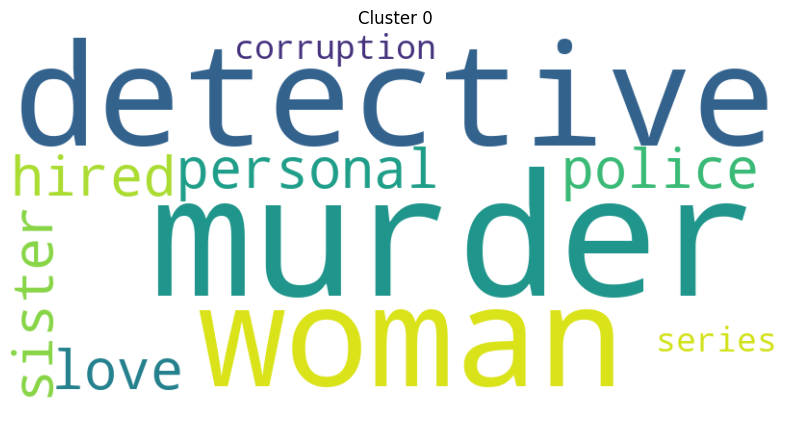

----------------------------------------------------------------------------


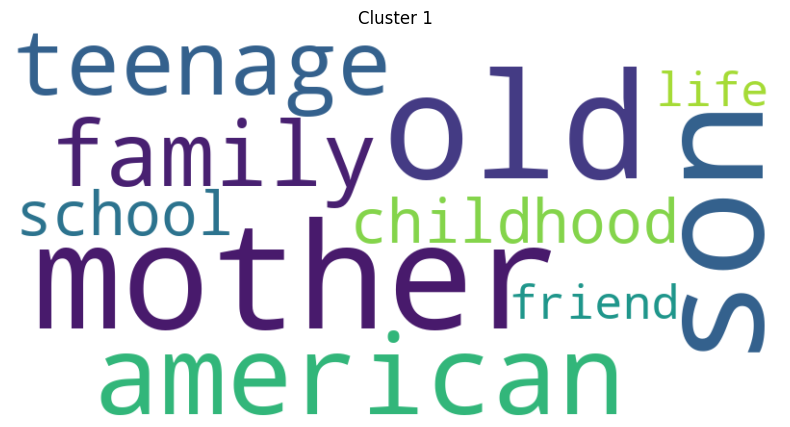

----------------------------------------------------------------------------


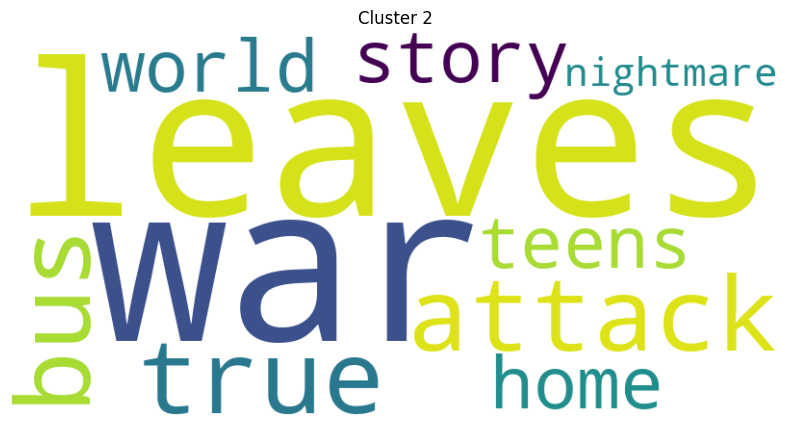

----------------------------------------------------------------------------


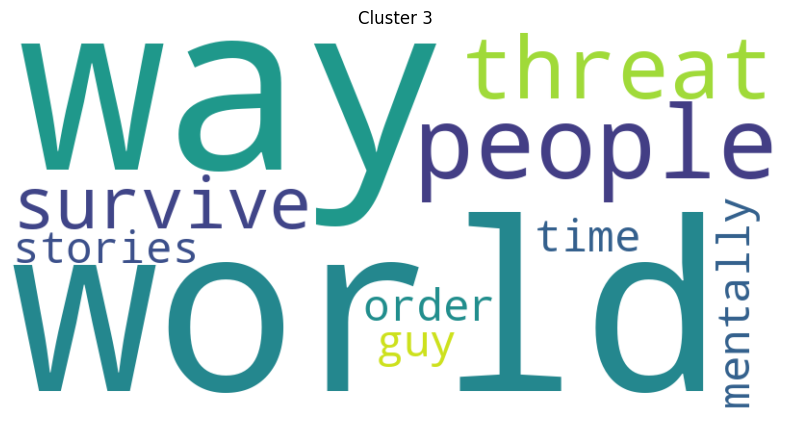

----------------------------------------------------------------------------


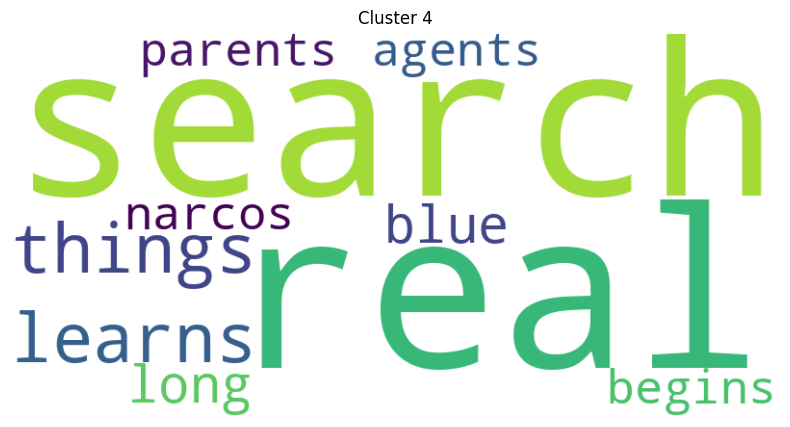

----------------------------------------------------------------------------


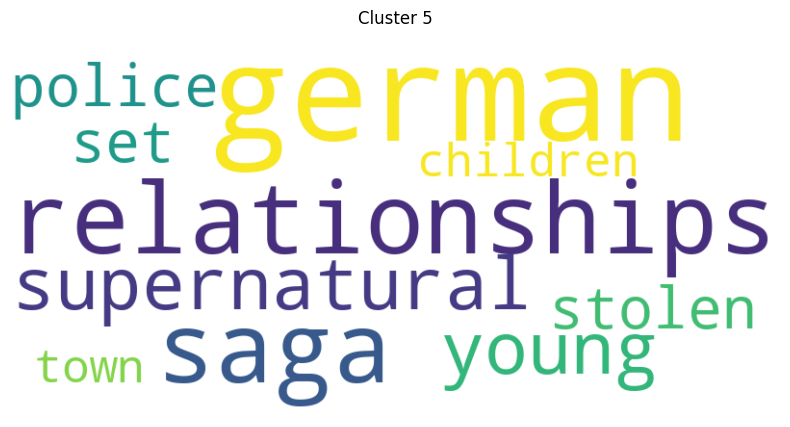

----------------------------------------------------------------------------


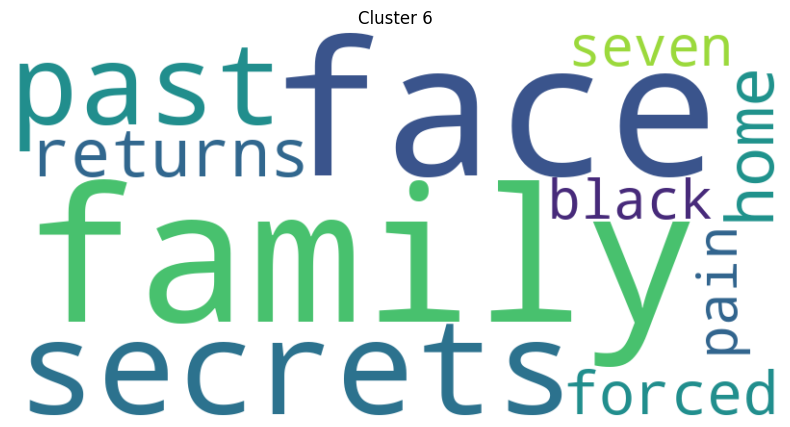

----------------------------------------------------------------------------


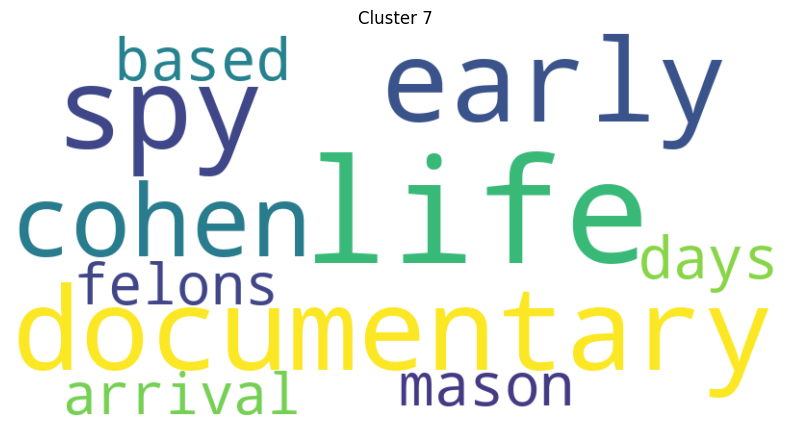

----------------------------------------------------------------------------


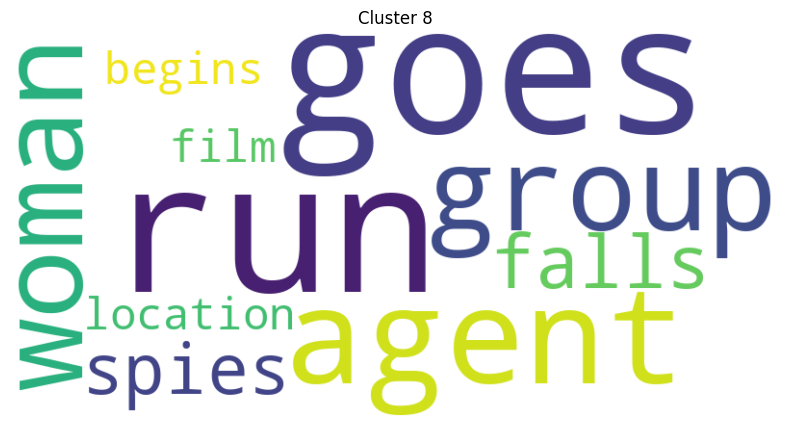

----------------------------------------------------------------------------


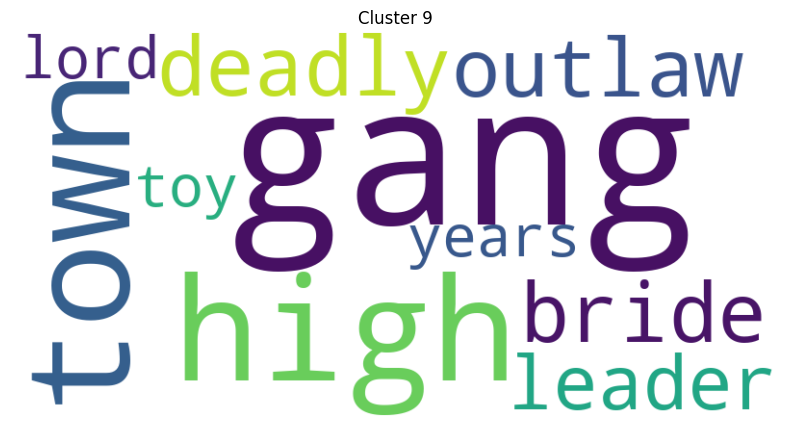

----------------------------------------------------------------------------


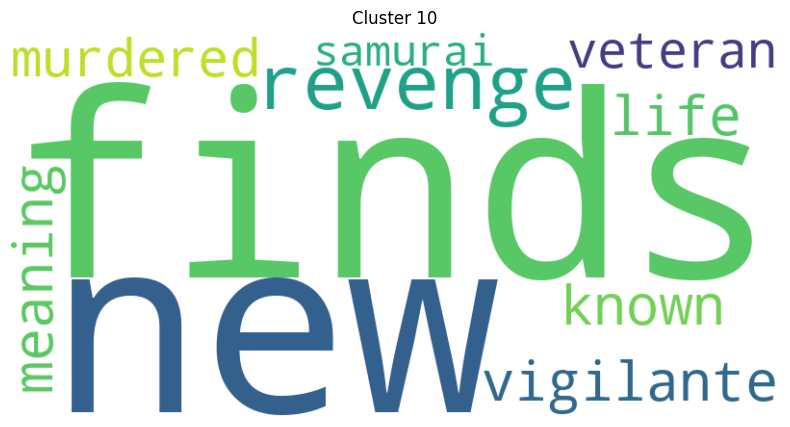

----------------------------------------------------------------------------


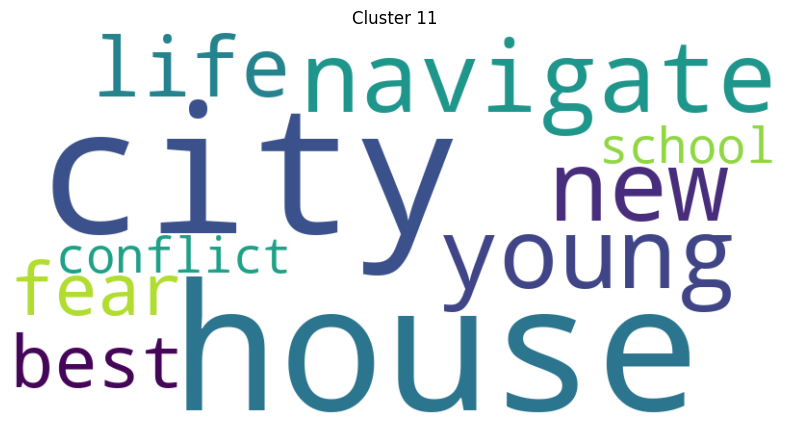

----------------------------------------------------------------------------


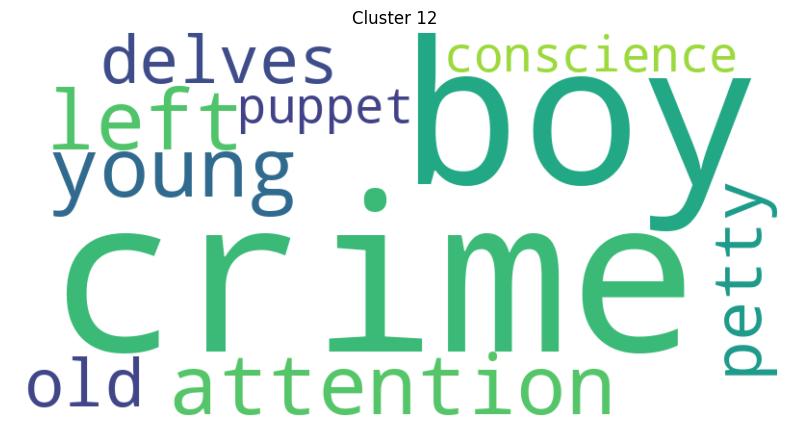

----------------------------------------------------------------------------


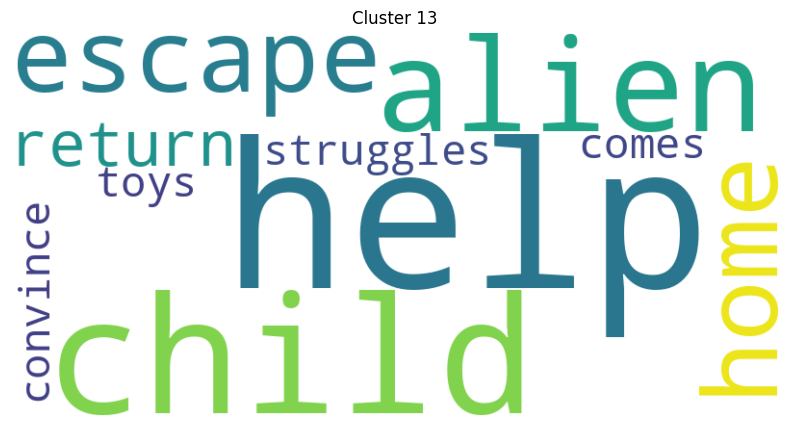

----------------------------------------------------------------------------


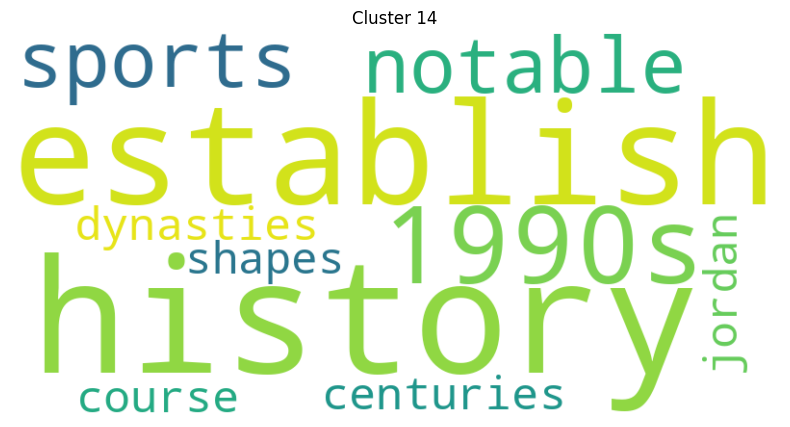

----------------------------------------------------------------------------


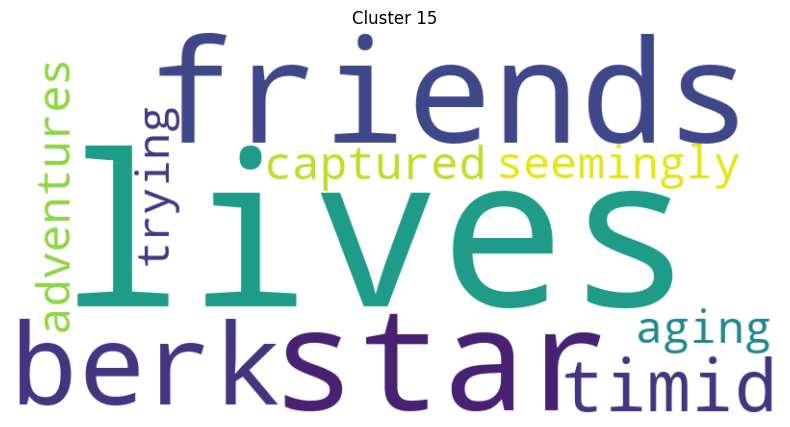

----------------------------------------------------------------------------


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# สร้าง WordCloud object โดยกำหนดความกว้าง และความสูงของ WordCloud และสีพื้นหลัง
wordcloud = WordCloud(width=800, height=400, background_color='white')

# วนลูปผ่าน cluster
for i in range(k):
     # ดึงคำที่สำคัญสำหรับ cluster ปัจจุบัน
    top_terms = [terms[j] for j in order_centroid[i, :10]]

    # เชื่อมต่อคำที่สำคัญเหล่านั้นเข้าด้วยกันเป็นข้อความเดียว
    cluster_text = ' '.join(top_terms)

    # สร้าง WordCloud สำหรับ cluster ปัจจุบัน
    cluster_wordcloud = wordcloud.generate(cluster_text)

   # พล็อต WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(cluster_wordcloud, interpolation='bilinear')
    plt.title('Cluster {}'.format(i))
    plt.axis('off')
    plt.show()
    print("----------------------------------------------------------------------------")


#การทำนายจากข้อความ unseen โดยทำนายว่าตรงกับ Cluster ใด

In [ ]:
# ลบตัวแปร unseen_text ถ้ามีอยู่เพื่อให้แน่ใจว่าไม่มีค่าเก่าเหลืออยู่
del unseen_text

# กำหนดข้อความที่ไม่เคยเห็นมาก่อน
unseen_text = "The history of the United States from the 1950s to the '70s unfolds from the perspective of an Alabama man with an IQ of 75, who yearns to be reunited with his childhood sweetheart."
# แปลงข้อความที่ไม่เคยเห็นมาก่อนให้อยู่ในรูปแบบเวกเตอร์เหมือนกับข้อมูลที่ใช้สร้างโมเดล
unseen_text_vectorized = vectorizer.transform([unseen_text])

# ทำนาย cluster สำหรับข้อความที่ไม่เคยเห็นมาก่อน
predicted_cluster = model.predict(unseen_text_vectorized)

# พิมพ์ผลลัพธ์ที่ทำนายได้สำหรับ cluster ของข้อความที่ไม่เคยเห็นมาก่อน
print("Predicted cluster for the unseen text:", predicted_cluster[0])


Predicted cluster for the unseen text: 0


#แสดงเวกเตอร์

In [ ]:
unseen_text_vectorized

<1x1598 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

#แสดงหนังที่มีค่า cluster เหมือนกับค่าที่ทำนายได้

In [ ]:
# ใช้คำสั่งต่อไปนี้เพื่อค้นหาหนังที่มี cluster เหมือนกับที่ทำนายได้จากข้อความที่ไม่เคยเห็นมาก่อน
findMovie = table[table['cluster'] == predicted_cluster[0]]

# พิมพ์ DataFrame ของหนังที่มี cluster เหมือนกับที่ทำนายได้
findMovie


,name,title,rating,votes,cluster
9,TheCrown,political rivalries romances reign events shap...,8.6,255502,0
12,Formula1:DrivetoSurvive,Docuseries following across multiple seasons.,8.5,50512,0
21,"Love,Death&Robots",collection animated short stories span various...,8.4,195588,0
26,TheLastKingdom,"defends kingdom invaders, raised claim ancestr...",8.5,164762,0
28,Unbelievable,"teenager charged lying raped, two detectives f...",8.3,119004,0
30,TheMechanism,fiction series loosely inspired investigation ...,8,36668,0
31,Kingdom,"strange rumors ill grip kingdom, crown prince ...",8.3,54068,0
39,MasterofNone,"personal professional life Dev, 30-year-old actor",8.2,76151,0
55,Lucifer,decided he's enough dutiful servant decides sp...,8.1,354319,0
59,Lovesick,"finding STD, must get back touch every girl ev...",8,22528,0


#หนังที่มีคำตรงกันกับ Unseen มากที่สุด

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# แปลงข้อความที่ไม่เคยเห็นมาก่อนให้อยู่ในรูปแบบของเวกเตอร์เหมือนกับข้อมูลที่ใช้สร้างโมเดล
unseen_text_vectorized = vectorizer.transform([unseen_text])

# ทำการทำนาย cluster สำหรับข้อความที่ไม่เคยเห็นมาก่อน
predicted_cluster = model.predict(unseen_text_vectorized)

# กรองแถวที่ cluster เท่ากับ predicted_cluster
cluster_data = table[table['cluster'] == predicted_cluster[0]]

# คำนวณ cosine similarity ระหว่างเวกเตอร์ของข้อความที่ไม่เคยเห็นมาก่อนกับเวกเตอร์ของหัวข้อทั้งหมดใน cluster ที่กรองแล้ว
similarities = cosine_similarity(unseen_text_vectorized, X[cluster_data.index])

# หาดัชนีของหัวข้อที่มีความคล้ายคลึงที่สุดภายใน cluster
most_similar_index = similarities.argmax()

# รับชื่อและหัวข้อที่เกี่ยวข้องจาก DataFrame
most_similar_title = cluster_data.iloc[most_similar_index]['title']
most_similar_name = cluster_data.iloc[most_similar_index]['name']

print("Most similar name in the DataFrame:", most_similar_name)
print("Most similar title in the DataFrame:", most_similar_title)


Most similar name in the DataFrame: 12YearsaSlave
Most similar title in the DataFrame: antebellum States, Northup, free man upstate abducted sold slavery.


#แสดงDataFrame  ที่มีcluster เท่ากับค่าที่ทำนายได้ ที่มีค่า rating มากไปน้อย 10อันดับ

In [ ]:
# กรองแถวที่ cluster เท่ากับค่า cluster ที่ทำนายได้
cluster_13_data = table[table['cluster'] == predicted_cluster[0]]
# เรียงลำดับแถวตามคอลัมน์ 'rating' ในลำดับจากมากไปน้อยและแสดงเฉพาะ 10 แถวแรก
cluster_13_top_10 = cluster_13_data.sort_values(by='rating', ascending=False).head(10)

cluster_13_top_10


,name,title,rating,votes,cluster
100,12AngryMen,jury murder trial frustrated single member who...,9,860786,0
177,"TheGood,theBadandtheUgly",bounty hunting scam joins two men uneasy allia...,8.8,808477,0
9,TheCrown,political rivalries romances reign events shap...,8.6,255502,0
26,TheLastKingdom,"defends kingdom invaders, raised claim ancestr...",8.5,164762,0
12,Formula1:DrivetoSurvive,Docuseries following across multiple seasons.,8.5,50512,0
21,"Love,Death&Robots",collection animated short stories span various...,8.4,195588,0
196,Vertigo,former police detective juggles wrestling pers...,8.3,425579,0
31,Kingdom,"strange rumors ill grip kingdom, crown prince ...",8.3,54068,0
28,Unbelievable,"teenager charged lying raped, two detectives f...",8.3,119004,0
188,TheWagesofFear,"decrepit village, four men hired transport urg...",8.2,66217,0


#บันทึกไฟล์csv

In [ ]:
table.to_csv('movie.csv', index=False)  # บันทึกเป็น CSV โดยไม่รวม index

#บันทึกตัวโมเดล

In [ ]:
from joblib import dump

# บันทึกโมเดล KMeans เป็นไฟล์ .pkl
dump(model, 'kmeans_model.pkl')


['kmeans_model.pkl']